# Hausaufgabe 5 

## Integration einer Bewegungsgleichung: Freier Fall - Wiederholung

In dieser Aufgabe werden wir erneut die Bewegungsgleichung des freien Falls numerisch mit dem Euler Verfahren lösen. Die Bewegungsgleichung hat die Form:
\begin{equation}\tag{1}
 \ddot x = \frac{\mathrm{d}^2x}{\mathrm{d}t^2}= a
\end{equation}

Dieses Mal soll die Bewegungsgleichung nicht "per Hand" sondern rekursiv mittels einer Schleife gelöst werden. 

## 1. Integration mit Schleife

**a)** Lösen Sie erneut Gleichung (1) für fünf Zeitschritte $\Delta t = 0.1$, indem Sie die Gleichungen (3) und (4) für die Anfangswerte $x_0=x\left(t=0\right) = 2$ und $v_0=v\left(t=0\right) = 1$ numerisch mit Hilfe einer Schleife integrieren. Dabei soll $a=-9.81$ sein. Speichern Sie die numerisch berechneten Positionen in einer Liste indem Sie `append()` benutzen.

Als Erinerrung:

\begin{equation} \tag{2}
x\!\left( t \right) = x_0 + v_0 t + \frac{1}{2} a t^2.
\end{equation}

\begin{align}\tag{3}
        x\left(t+\Delta t \right) &= x\left(t\right) + v\left(t\right) \Delta t \\ 
        v\left(t+\Delta t \right) &= v\left(t\right) + a\Delta t \tag{4}
    \end{align}
    


In [1]:
import numpy as np # numpy import
x0 = 2 # def x0
v0 = 1 # def v0
a = -9.81 # def a

listev = [1] # listev mit Eintrag v0 = 1

for v in range(3): # Schleife
    j = v0 + a * 0.1 # def j durch Formel 4
    v0 = j # setze v wieder ein
    listev.append(j) # liste
    
listex =[2] # listex mit x0 = 2

for z in listev: # schleife
    i = x0 + z * 0.1 # formel 3
    x0 = i # setze x wieder ein
    listex.append(i) # liste
    
print(listex) # drucke

[2, 2.1, 2.1019, 2.0057, 1.8114]


**b)** Plotten Sie diese Positionen in einem Diagramm mit der Bahnkurve (Gleichung (2)). Benutzen Sie das mit `ax.scatter()` erweiterte Grundgerüst von `helpPlotScatter.ipynb`. 

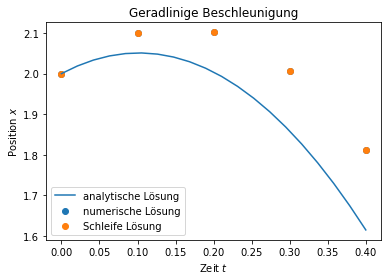

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
x0 = 2.0
v0 = 1.0
a = -9.81

x1 = x0 + v0 * dt
v1 = v0 + a * dt

x2 = x1 + v1 * dt
v2 = v1 + a * dt

x3 = x2 + v2 * dt
v3 = v2 + a * dt

x4 = x3 + v3 * dt
v4 = v3 + a * dt

t = np.linspace(0, 4*dt, 20)
xAnalytic = x0 + v0 * t + 0.5 * a * t**2

xNumeric = np.array([x0, x1, x2, x3, x4])
tNumeric = np.linspace(0,4*dt,5) 

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")
ax.plot(t, xAnalytic, label='analytische Lösung') 
ax.scatter(tNumeric, xNumeric, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

#######
ax.scatter(tNumeric, listex, label='Schleife Lösung') # Listex gegen t plotten
#######

plt.legend(loc=3)
plt.show()

## 2. Variation des Zeitschrittes

Sie sollten nun die Abbildung aus Hausaufgabe 3 reproduziert haben.

**a)** Wiederholen Sie Aufgabe 1 mit einem Zeitschritt $\Delta t = 0.005$. Achten Sie darauf, dass die Integrationszeit gleich bleibt! Da Sie nun sehr viele Werte erzeugt haben, ist es sinnvoller die numerische Lösung ebenfalls in einem Linienplot mit `ax.plot()` darzustellen.

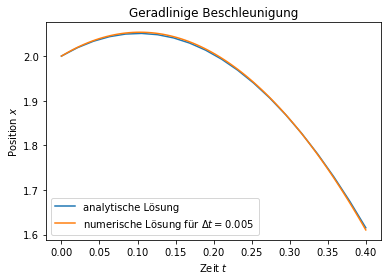

In [3]:
x0 = 2
v0 = 1 
a = -9.81

listev = [1]

for v in range(80):
    j = v0 + a * 0.005
    v0 = j
    listev.append(j)
    
listex =[2]

for z in listev:
    i = x0 + z * 0.005
    x0 = i
    listex.append(i)

dt = 0.1
x0 = 2.0
v0 = 1.0
a = -9.81

t = np.linspace(0, 4*dt, 20)
xAnalytic = x0 + v0 * t + 0.5 * a * t**2

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")
ax.plot(t, xAnalytic, label='analytische Lösung') 
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

#######
t2 = np.linspace(0, 0.4, 82) # t auf Werte von dt erweitern

ax.plot(t2, listex, label='numerische Lösung für $\Delta t = 0.005$ ')
#######
plt.legend(loc=3)
plt.show()

**b)** Berechnen Sie die quadratische Abweichung $\mathrm{SE}\left(t\right)$ zwischen der numerischen und analytischen Lösung abhängig vom Zeitschritt:
   $$ 
   \mathrm{SE}\left(t\right) = \left(x_{\mathrm{numerisch}}\left(t\right) - x_\mathrm{analytisch}\left(t\right)\right) ^2 \, .
   $$
Plotten Sie die quadratische Abweichung gegen die Zeit. Benutzen Sie geeignete Beschriftungen! 

Beschreiben Sie kurz, was Sie beobachten. 

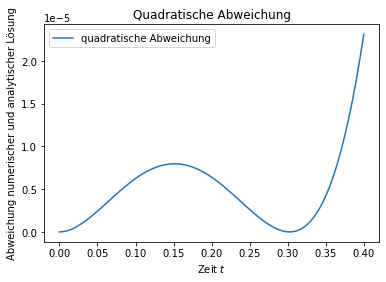

In [15]:
t = np.linspace(0, 4*dt, 82) 
xAnalytic = x0 + v0 * t + 0.5 * a * t**2

listeSE = [] # leere Liste

for i in range(len(listex)): # schleife
    listeSE.append((xAnalytic[i] - listex[i])**2) # Einträge aus listex in SE einsetzen

SE = (xAnalytic - listex)**2


fig, ax = plt.subplots()

ax.set_title("Quadratische Abweichung") 
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Abweichung numerischer und analytischer Lösung")


ax.plot(t2, listeSE, label='quadratische Abweichung')
plt.legend(loc=2)
plt.show()

